In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)
options(tibble.print_max = 200, width=200)
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=300)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
nhgc_d5 = qs::qread('../01_milo_cellbender/_targets_MAST/objects/combined_nhgc_Day5.obob5v5__v__Day5.obobBL6d5') 
nhgc_d5

rowname,restored_grouping,bl6_grouping,fgf1_grouping
<chr>,<fct>,<chr>,<chr>
SI-TT-F10_AGCGTATCAATTTCCT,pos_away,pos,pos
SI-TT-E12_AGATGCTGTAAGAACT,pos_away,pos,pos
SI-TT-F11_TTCGGTCGTCCGGTGT,pos_away,pos,pos
SI-TT-F10_ACAGAAAGTGCATACT,neg_restored,pos,neg
SI-TT-F10_ACTATGGAGCCTGCCA,neg_restored,pos,neg
SI-TT-F10_GGGTCACGTCATAACC,neg_restored,pos,neg
SI-TT-A12_TTAGGCAGTACTGACT,neg_restored,pos,neg
SI-TT-B12_CCTCCAAGTTGACGGA,neg_restored,pos,neg
SI-TT-B12_TGTTCCGGTCTGTGTA,neg_restored,pos,neg


In [4]:
neuron_meta = qs::qread('../00_cellbender/_targets/objects/obj_cb_neuron_00') %>% `[[`
other_meta = qs::qread('../00_cellbender/_targets/objects/obj_cb_other_01') %>% `[[`

In [9]:
tany_meta = qs::qread('../00_cellbender/_targets/objects/obj_cb_tany') %>% `[[`

In [32]:
d5_meta = bind_rows((neuron_meta %>% rownames_to_column), 
          (other_meta %>% rownames_to_column),
          (tany_meta %>% rownames_to_column)) %>%
filter(!(labels_lvl1 == 'Tanycytes' & is.na(labels_lvl2))) %>%
right_join(nhgc_d5, by = 'rowname') %>%
filter(time == 'Day5') %>%
filter(strain == 'obob')

d5_meta

rowname,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,⋯,class,integrated_snn_res.0.8,labels_lvl1_mg,labels_lvl1,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6796,3192,22352,4816,SI-TT-A11,1000,12,D706,⋯,neuron,13,neuron,Nfix/Nfib,0.7456349,Nfix/Nfib,n0,none,none,none
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6044,3023,21805,4803,SI-TT-A11,2167,12,D706,⋯,neuron,36,neuron,Sim1,1.0000000,Sim1,n6,none,none,none
SI-TT-A11_AAACCCATCCCATAAG,SI-TT-A11,13239,4513,37468,5802,SI-TT-A11,1790,12,D706,⋯,neuron,16,neuron,Fez1,0.9429207,Fez1,n4,none,none,none
SI-TT-A11_AAACGCTCATCTATCT,SI-TT-A11,17081,5220,43140,6463,SI-TT-A11,1507,12,D706,⋯,neuron,16,neuron,Fez1,0.8373555,Fez1,n4,none,none,none
SI-TT-A11_AAACGCTGTTCGGTAT,SI-TT-A11,8448,3617,27828,5392,SI-TT-A11,1260,12,D706,⋯,neuron,9,neuron,Htr3b,1.0000000,Htr3b,n0,neg_FGF1,none,neg
SI-TT-A11_AAAGAACCATGACTTG,SI-TT-A11,7713,3575,35327,5792,SI-TT-A11,1881,12,D706,⋯,neuron,4,neuron,Lepr67,0.6623647,Lepr67,n4,none,none,none
SI-TT-A11_AAAGAACGTCGCATGC,SI-TT-A11,2995,1817,6691,2828,SI-TT-A11,567,12,D706,⋯,neuron,47,neuron,Lepr89,0.4509141,Lepr89,n4,none,none,none
SI-TT-A11_AAAGGATAGCTTCATG,SI-TT-A11,4603,2562,15929,4233,SI-TT-A11,907,12,D706,⋯,neuron,32,neuron,Arx/Nr5a2,0.9942226,Arx/Nr5a2,n0,none,none,none
SI-TT-A11_AAAGGATAGGATAATC,SI-TT-A11,6577,3199,26312,5134,SI-TT-A11,1904,12,D706,⋯,neuron,4,neuron,Lepr67,0.8047130,Lepr67,n4,none,none,none


In [ ]:
d5_meta

In [33]:
dim(d5_meta)

[1] 52605    44

In [34]:
d5_meta %>% distinct(rowname) %>% dim

[1] 52605     1

In [44]:
d5_meta  %>%
        mutate(labels = labels_lvl2) %>%
        rowwise %>%
        mutate(polar_label = paste0(labels, '.', fgf1_grouping)) %>%
        ungroup 

rowname,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,⋯,labels_lvl1_mg,labels_lvl1,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping,labels,polar_label
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6796,3192,22352,4816,SI-TT-A11,1000,12,D706,⋯,neuron,Nfix/Nfib,0.7456349,Nfix/Nfib,n0,none,none,none,Nfix/Nfib,Nfix/Nfib.none
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6044,3023,21805,4803,SI-TT-A11,2167,12,D706,⋯,neuron,Sim1,1.0000000,Sim1,n6,none,none,none,Sim1,Sim1.none
SI-TT-A11_AAACCCATCCCATAAG,SI-TT-A11,13239,4513,37468,5802,SI-TT-A11,1790,12,D706,⋯,neuron,Fez1,0.9429207,Fez1,n4,none,none,none,Fez1,Fez1.none
SI-TT-A11_AAACGCTCATCTATCT,SI-TT-A11,17081,5220,43140,6463,SI-TT-A11,1507,12,D706,⋯,neuron,Fez1,0.8373555,Fez1,n4,none,none,none,Fez1,Fez1.none
SI-TT-A11_AAACGCTGTTCGGTAT,SI-TT-A11,8448,3617,27828,5392,SI-TT-A11,1260,12,D706,⋯,neuron,Htr3b,1.0000000,Htr3b,n0,neg_FGF1,none,neg,Htr3b,Htr3b.neg
SI-TT-A11_AAAGAACCATGACTTG,SI-TT-A11,7713,3575,35327,5792,SI-TT-A11,1881,12,D706,⋯,neuron,Lepr67,0.6623647,Lepr67,n4,none,none,none,Lepr67,Lepr67.none
SI-TT-A11_AAAGAACGTCGCATGC,SI-TT-A11,2995,1817,6691,2828,SI-TT-A11,567,12,D706,⋯,neuron,Lepr89,0.4509141,Lepr89,n4,none,none,none,Lepr89,Lepr89.none
SI-TT-A11_AAAGGATAGCTTCATG,SI-TT-A11,4603,2562,15929,4233,SI-TT-A11,907,12,D706,⋯,neuron,Arx/Nr5a2,0.9942226,Arx/Nr5a2,n0,none,none,none,Arx/Nr5a2,Arx/Nr5a2.none
SI-TT-A11_AAAGGATAGGATAATC,SI-TT-A11,6577,3199,26312,5134,SI-TT-A11,1904,12,D706,⋯,neuron,Lepr67,0.8047130,Lepr67,n4,none,none,none,Lepr67,Lepr67.none


In [35]:
d5_cells = d5_meta %>% pull(rowname)

In [37]:
neuron_obj = qs::qread('../00_cellbender/_targets/objects/obj_cb_neuron_00') %>% subset(cells = d5_cells)
other_obj = qs::qread('../00_cellbender/_targets/objects/obj_cb_other_01') %>% subset(cells = d5_cells)
obj = merge(neuron_obj, other_obj) %>%
AddMetaData(d5_meta %>% column_to_rownames)

In [38]:
obj

An object of class Seurat 
30374 features across 52605 samples within 2 assays 
Active assay: integrated (3113 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [18]:
obj = merge(neuron_obj, other_obj)

In [19]:
obj

An object of class Seurat 
30374 features across 52605 samples within 2 assays 
Active assay: integrated (3113 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [39]:
obj %>% `[[` %>% head

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,nCount_spliced_SCOP,⋯,class,integrated_snn_res.0.8,labels_lvl1_mg,labels_lvl1,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6796,3192,22352,4816,SI-TT-A11,1000,12,D706,2976,⋯,neuron,13,neuron,Nfix/Nfib,0.7456349,Nfix/Nfib,n0,none,none,none
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6044,3023,21805,4803,SI-TT-A11,2167,12,D706,3573,⋯,neuron,36,neuron,Sim1,1.0000000,Sim1,n6,none,none,none
SI-TT-A11_AAACCCATCCCATAAG,SI-TT-A11,13239,4513,37468,5802,SI-TT-A11,1790,12,D706,5281,⋯,neuron,16,neuron,Fez1,0.9429207,Fez1,n4,none,none,none
SI-TT-A11_AAACGCTCATCTATCT,SI-TT-A11,17081,5220,43140,6463,SI-TT-A11,1507,12,D706,6252,⋯,neuron,16,neuron,Fez1,0.8373555,Fez1,n4,none,none,none
SI-TT-A11_AAACGCTGTTCGGTAT,SI-TT-A11,8448,3617,27828,5392,SI-TT-A11,1260,12,D706,3881,⋯,neuron,9,neuron,Htr3b,1.0000000,Htr3b,n0,neg_FGF1,none,neg
SI-TT-A11_AAAGAACCATGACTTG,SI-TT-A11,7713,3575,35327,5792,SI-TT-A11,1881,12,D706,4901,⋯,neuron,4,neuron,Lepr67,0.6623647,Lepr67,n4,none,none,none


In [23]:
d5_meta %>% dim

[1] 56446    44

In [25]:
d5_meta %>%
  mutate(duplicated_rowname = duplicated(rowname) | duplicated(rowname, fromLast = TRUE)) %>%
filter(duplicated_rowname)

rowname,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,⋯,integrated_snn_res.0.8,labels_lvl1_mg,labels_lvl1,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping,duplicated_rowname
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<lgl>
SI-TT-A11_AAAGGATTCAACCCGG,SI-TT-A11,1761,1248,5875,2654,SI-TT-A11,1304,12,D706,⋯,17,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AAAGTCCGTCCACAGC,SI-TT-A11,3096,1904,7687,3102,SI-TT-A11,1606,12,D706,⋯,1,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AAAGTGACACATATGC,SI-TT-A11,4999,2545,13216,3727,SI-TT-A11,1547,12,D706,⋯,17,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AAATGGATCACAGTGT,SI-TT-A11,2021,1427,6700,2846,SI-TT-A11,1016,12,D706,⋯,16,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AACCACACATGAAGCG,SI-TT-A11,2477,1616,7390,2900,SI-TT-A11,1918,12,D706,⋯,1,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AACCACATCGGCATCG,SI-TT-A11,2421,1572,8290,3176,SI-TT-A11,1932,12,D706,⋯,8,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AACCTGAGTAGACGTG,SI-TT-A11,2060,1409,7378,2876,SI-TT-A11,1701,12,D706,⋯,1,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AAGCGAGGTATCAAGA,SI-TT-A11,1477,1136,4777,2293,SI-TT-A11,2217,12,D706,⋯,4,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE
SI-TT-A11_AAGCGTTCAACTCCAA,SI-TT-A11,4402,2351,10324,3464,SI-TT-A11,1707,12,D706,⋯,16,NA,Tanycytes,NA,NA,g1,none,none,none,TRUE


In [42]:
make_obj_d5 = function(nhgc_d5_path, neuron_path, other_path, tany_path){
    nhgc_d5 = qs::qread(nhgc_d5_path) 
    neuron_meta = qs::qread(neuron_path) %>% `[[`
    other_meta = qs::qread(other_path) %>% `[[`
    tany_meta = qs::qread(tany_path) %>% `[[`
    d5_meta = bind_rows((neuron_meta %>% rownames_to_column), 
                        (other_meta %>% rownames_to_column),
                        (tany_meta %>% rownames_to_column)) %>%
        filter(!(labels_lvl1 == 'Tanycytes' & is.na(labels_lvl2))) %>%
        filter(!str_detect(labels_chunk, 'drop')) %>%
        right_join(nhgc_d5, by = 'rowname') %>%
        filter(time == 'Day5') %>%
        filter(strain == 'obob')
    d5_cells = d5_meta %>% pull(rowname)
    neuron_obj = qs::qread(neuron_path) %>% subset(cells = d5_cells)
    other_obj = qs::qread(other_path) %>% subset(cells = d5_cells)
    obj_d5 = merge(neuron_obj, other_obj) %>%
        AddMetaData(d5_meta %>% column_to_rownames)
    obj_d5
}

In [40]:
2

[1] 2

In [43]:
d5_meta  %>%
        filter(!str_detect(labels_chunk, 'drop')) %>% distinct(labels_chunk)

labels_chunk
<chr>
n0
n6
n4
n8
n2
n1
n5
n3
g3


In [45]:
obj = qs::qread('_targets/objects/obj_d5_00')

In [46]:
obj

An object of class Seurat 
27653 features across 39574 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [47]:
source('../01_milo_cellbender/milo_cellbender.R')

In [48]:
obj %>%
set_labels_to_class %>%
prep_obj_for_milo_cb_v01 %>% `[[`

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,nCount_spliced_SCOP,⋯,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping,labels,hash.mcl.ID,orig.batch,group
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6796,3192,22352,4816,SI-TT-A11,1000,12,D706,2976,⋯,0.7456349,Nfix/Nfib,n0,none,none,none,neuron,M8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6044,3023,21805,4803,SI-TT-A11,2167,12,D706,3573,⋯,1.0000000,Sim1,n6,none,none,none,neuron,N7,Batch 1,FGF1.Day5.obob
SI-TT-A11_AAACCCATCCCATAAG,SI-TT-A11,13238,4512,37468,5802,SI-TT-A11,1790,12,D706,5281,⋯,0.9429207,Fez1,n4,none,none,none,neuron,N8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAACGCTCATCTATCT,SI-TT-A11,17081,5220,43140,6463,SI-TT-A11,1507,12,D706,6252,⋯,0.8373555,Fez1,n4,none,none,none,neuron,N8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAACGCTGTTCGGTAT,SI-TT-A11,8448,3617,27828,5392,SI-TT-A11,1260,12,D706,3881,⋯,1.0000000,Htr3b,n0,neg_FGF1,none,neg,neuron,N8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGAACCATGACTTG,SI-TT-A11,7713,3575,35327,5792,SI-TT-A11,1881,12,D706,4901,⋯,0.6623647,Lepr67,n4,none,none,none,neuron,M8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGAACGTCGCATGC,SI-TT-A11,2995,1817,6691,2828,SI-TT-A11,567,12,D706,1261,⋯,0.4509141,Lepr89,n4,none,none,none,neuron,N7,Batch 1,FGF1.Day5.obob
SI-TT-A11_AAAGGATAGCTTCATG,SI-TT-A11,4603,2562,15929,4233,SI-TT-A11,907,12,D706,2217,⋯,0.9942226,Arx/Nr5a2,n0,none,none,none,neuron,M8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGGATAGGATAATC,SI-TT-A11,6575,3197,26312,5134,SI-TT-A11,1904,12,D706,3882,⋯,0.8047130,Lepr67,n4,none,none,none,neuron,N7,Batch 1,FGF1.Day5.obob


In [85]:
obj = qs::qread('_targets/objects/obj_d5_neuron')
obj

An object of class Seurat 
27653 features across 39574 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [83]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                         "nFeature_RNA"                       "nCount_RNA_SCOP"                    "nFeature_RNA_SCOP"                 
 [6] "Index.10x_SCOP"                     "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                  "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"              "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                 "HTO_mcl_secondID_SCOP"             
[16] "HTO_mcl_margin_SCOP"                "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP" "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"             "barcode_SCOP"                       "Index.10x"                          "barcode"                           
[26] "strain"                             "treatment"                          "time"                               "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"             "seurat_clusters"                    "class"                              "integrated_snn_res.0.8"            
[36] "labels_lvl1_mg"                     "labels_lvl1"                        "prediction.score.max"               "labels_lvl2"                        "labels_chunk"                      
[41] "restored_grouping"                  "bl6_grouping"                       "fgf1_grouping"                      "labels"                             "hash.mcl.ID"                       
[46] "orig.batch"                         "group"

In [64]:
meta = obj %>% `[[` %>% 
mutate(labels_lvl2 = case_when(is.na(labels_lvl2) ~ labels_lvl1,
                               TRUE ~ labels_lvl2))

In [65]:
obj = obj %>% AddMetaData(meta)

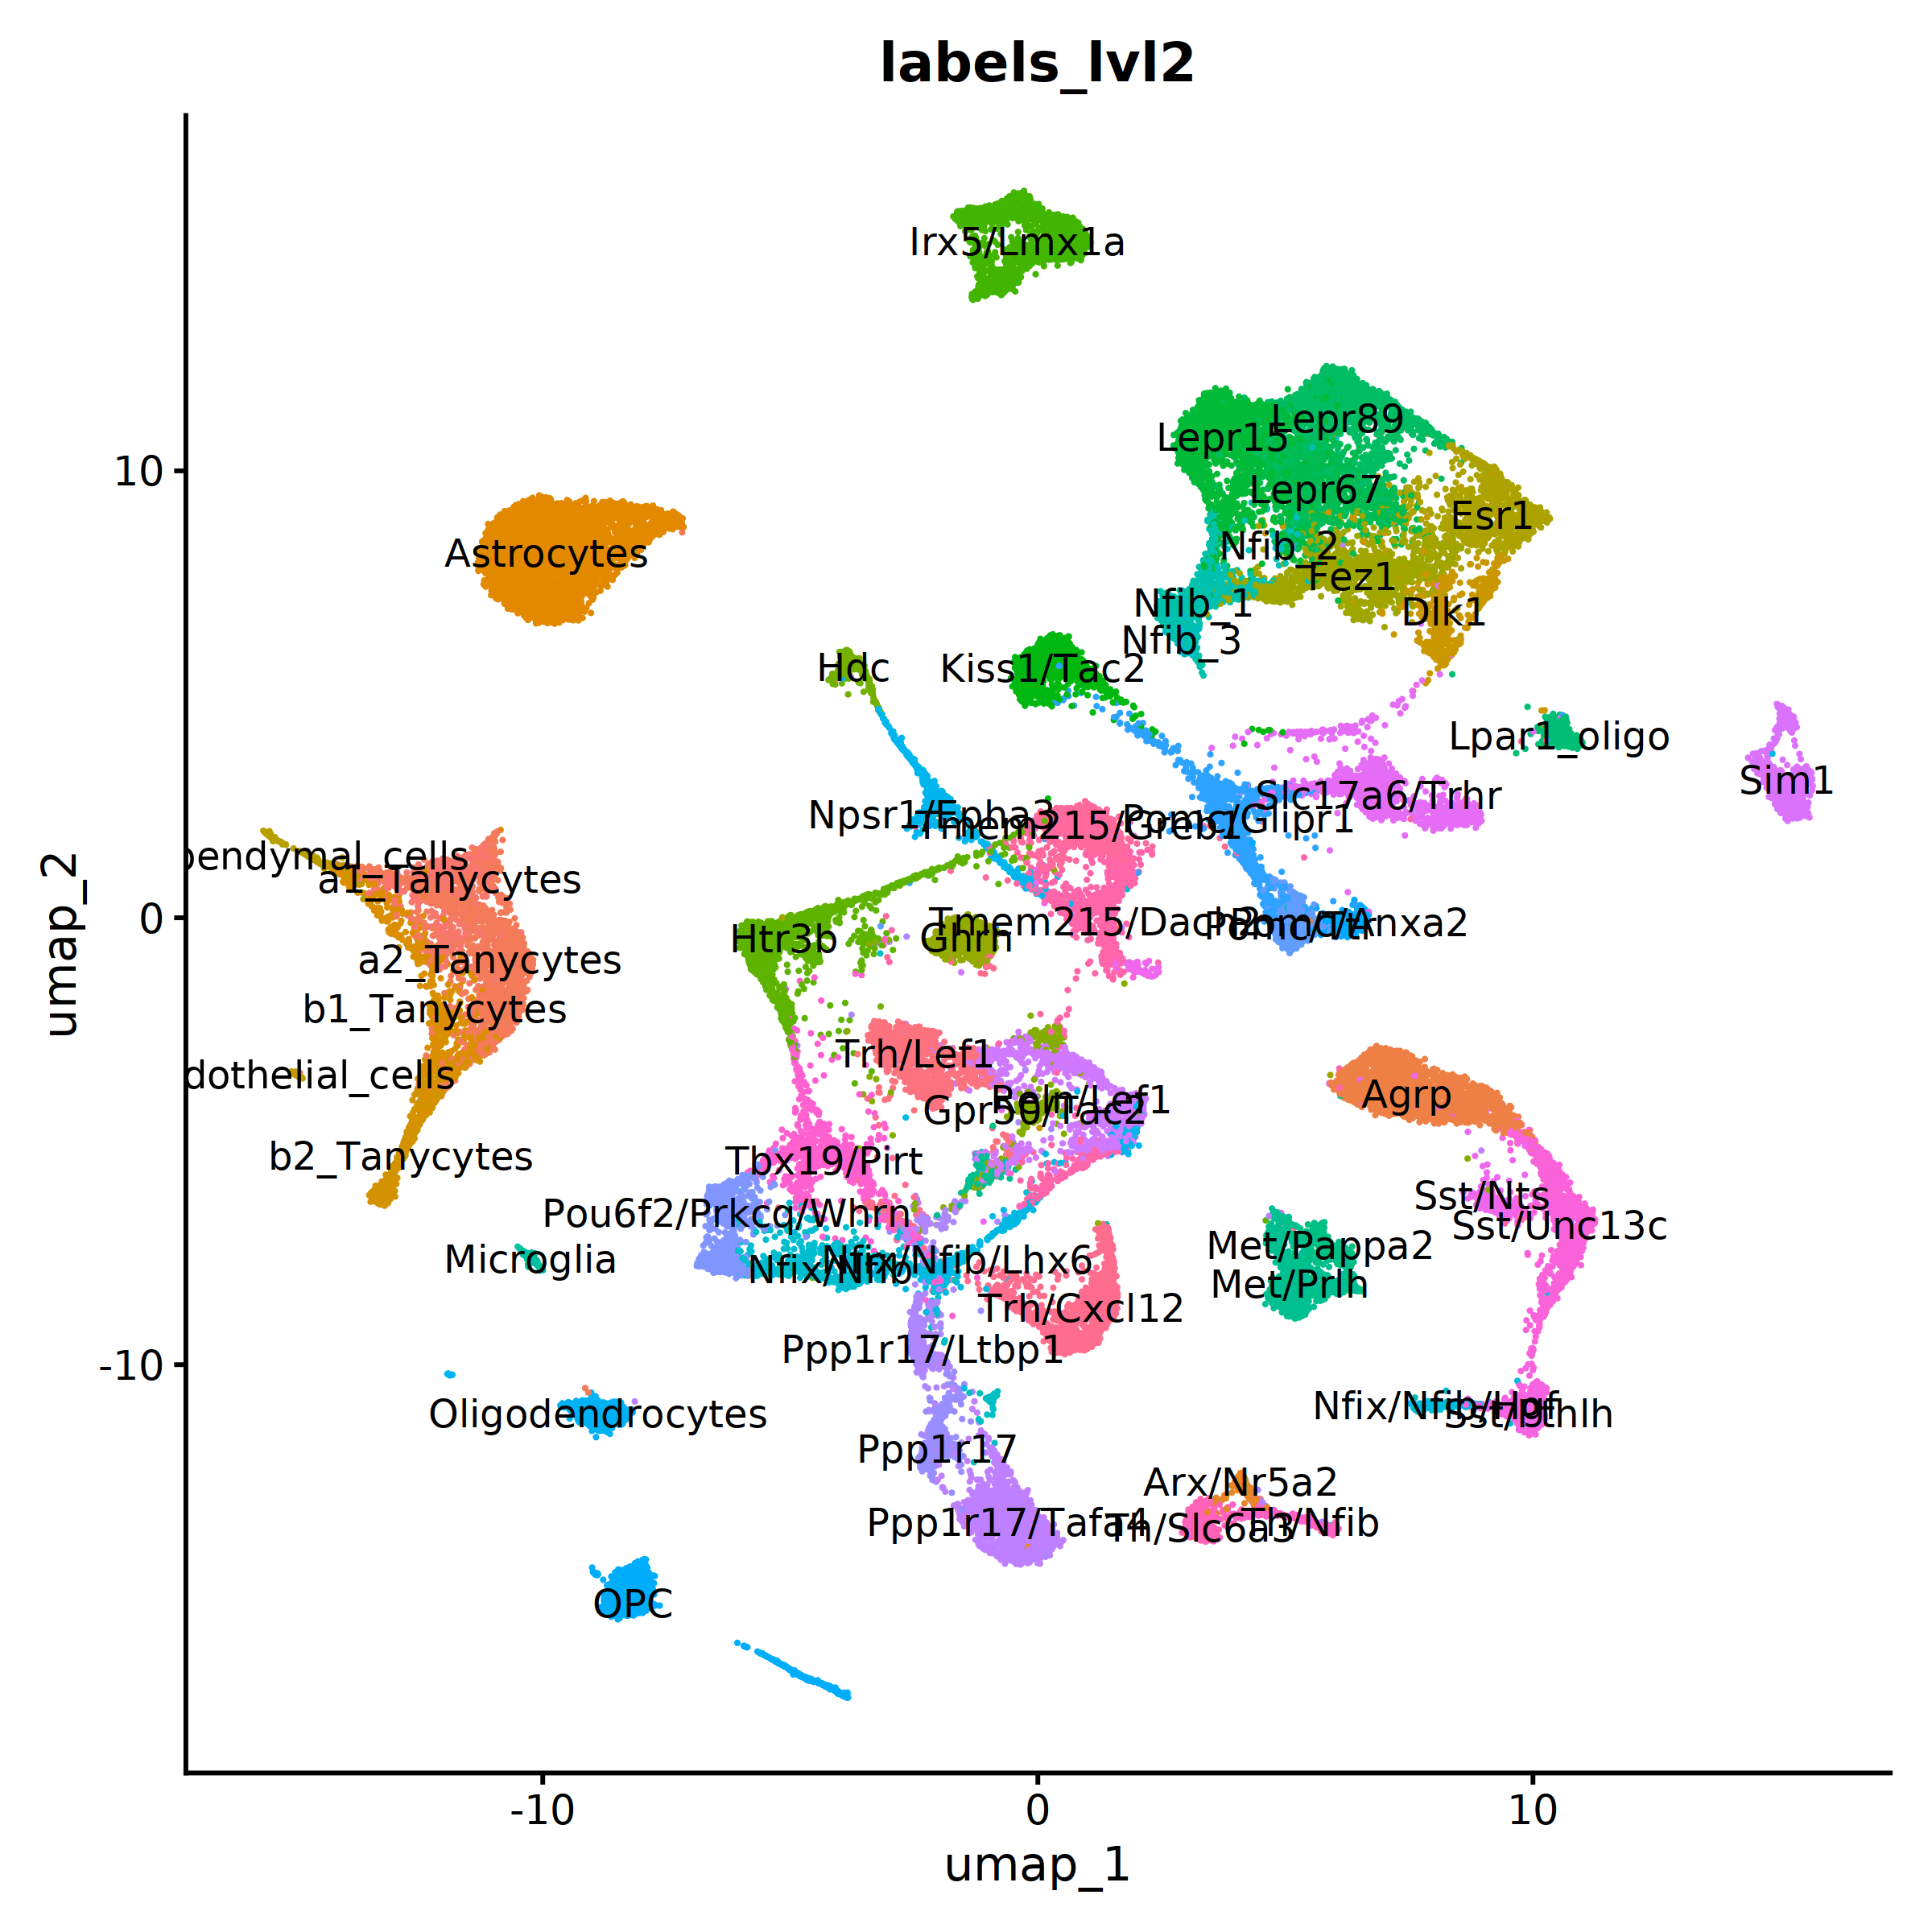

In [66]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(obj, group.by = 'labels_lvl2', label=TRUE) + NoLegend()

In [69]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('../01_milo_cellbender/milo_cellbender.R')
source("../code/resolve2xe/LoadResolveBaysor.R")
source("../01_resolve/resolve.R")
source("resolve_cellbender.R")

In [79]:
obj = obj %>%
                 set_labels_to_lvl2 %>%
                 prep_obj_for_milo_cb_v01 %>%
                 set_batch_to_lane %>% # do not set batch to lane for cluster splits, will error on design or model matrix. reset later
                 prep_obj_for_milo_cb_v01(set_orig.batch = FALSE)

In [80]:
obj %>% `[[` %>% head

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,nCount_spliced_SCOP,⋯,prediction.score.max,labels_lvl2,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping,labels,hash.mcl.ID,orig.batch,group
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
SI-TT-A11_AAACGAAAGGTTCTTG,SI-TT-A11,1922,1253,7617,2701,SI-TT-A11,788,12,D706,1178,⋯,NA,NA,g3,none,none,none,NA,M8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGGATTCAACCCGG,SI-TT-A11,1756,1243,5875,2654,SI-TT-A11,1304,12,D706,1188,⋯,NA,a2_Tanycytes,g1,none,none,none,a2_Tanycytes,N7,Batch 1,FGF1.Day5.obob
SI-TT-A11_AAAGGGCGTCACTTAG,SI-TT-A11,3175,1903,12989,3509,SI-TT-A11,1785,12,D706,1785,⋯,NA,NA,g3,none,none,none,NA,N8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGTCCCAAATAAGC,SI-TT-A11,3478,1828,8096,2764,SI-TT-A11,1283,12,D706,1879,⋯,NA,NA,g2,none,none,none,NA,M8,Batch 1,Veh_PF.Day5.obob
SI-TT-A11_AAAGTCCGTCCACAGC,SI-TT-A11,3092,1900,7687,3102,SI-TT-A11,1606,12,D706,1604,⋯,NA,a2_Tanycytes,g1,none,none,none,a2_Tanycytes,N7,Batch 1,FGF1.Day5.obob
SI-TT-A11_AAAGTGACACATATGC,SI-TT-A11,4997,2543,13216,3727,SI-TT-A11,1547,12,D706,2138,⋯,NA,a1_Tanycytes,g1,none,none,none,a1_Tanycytes,N8,Batch 1,Veh_PF.Day5.obob


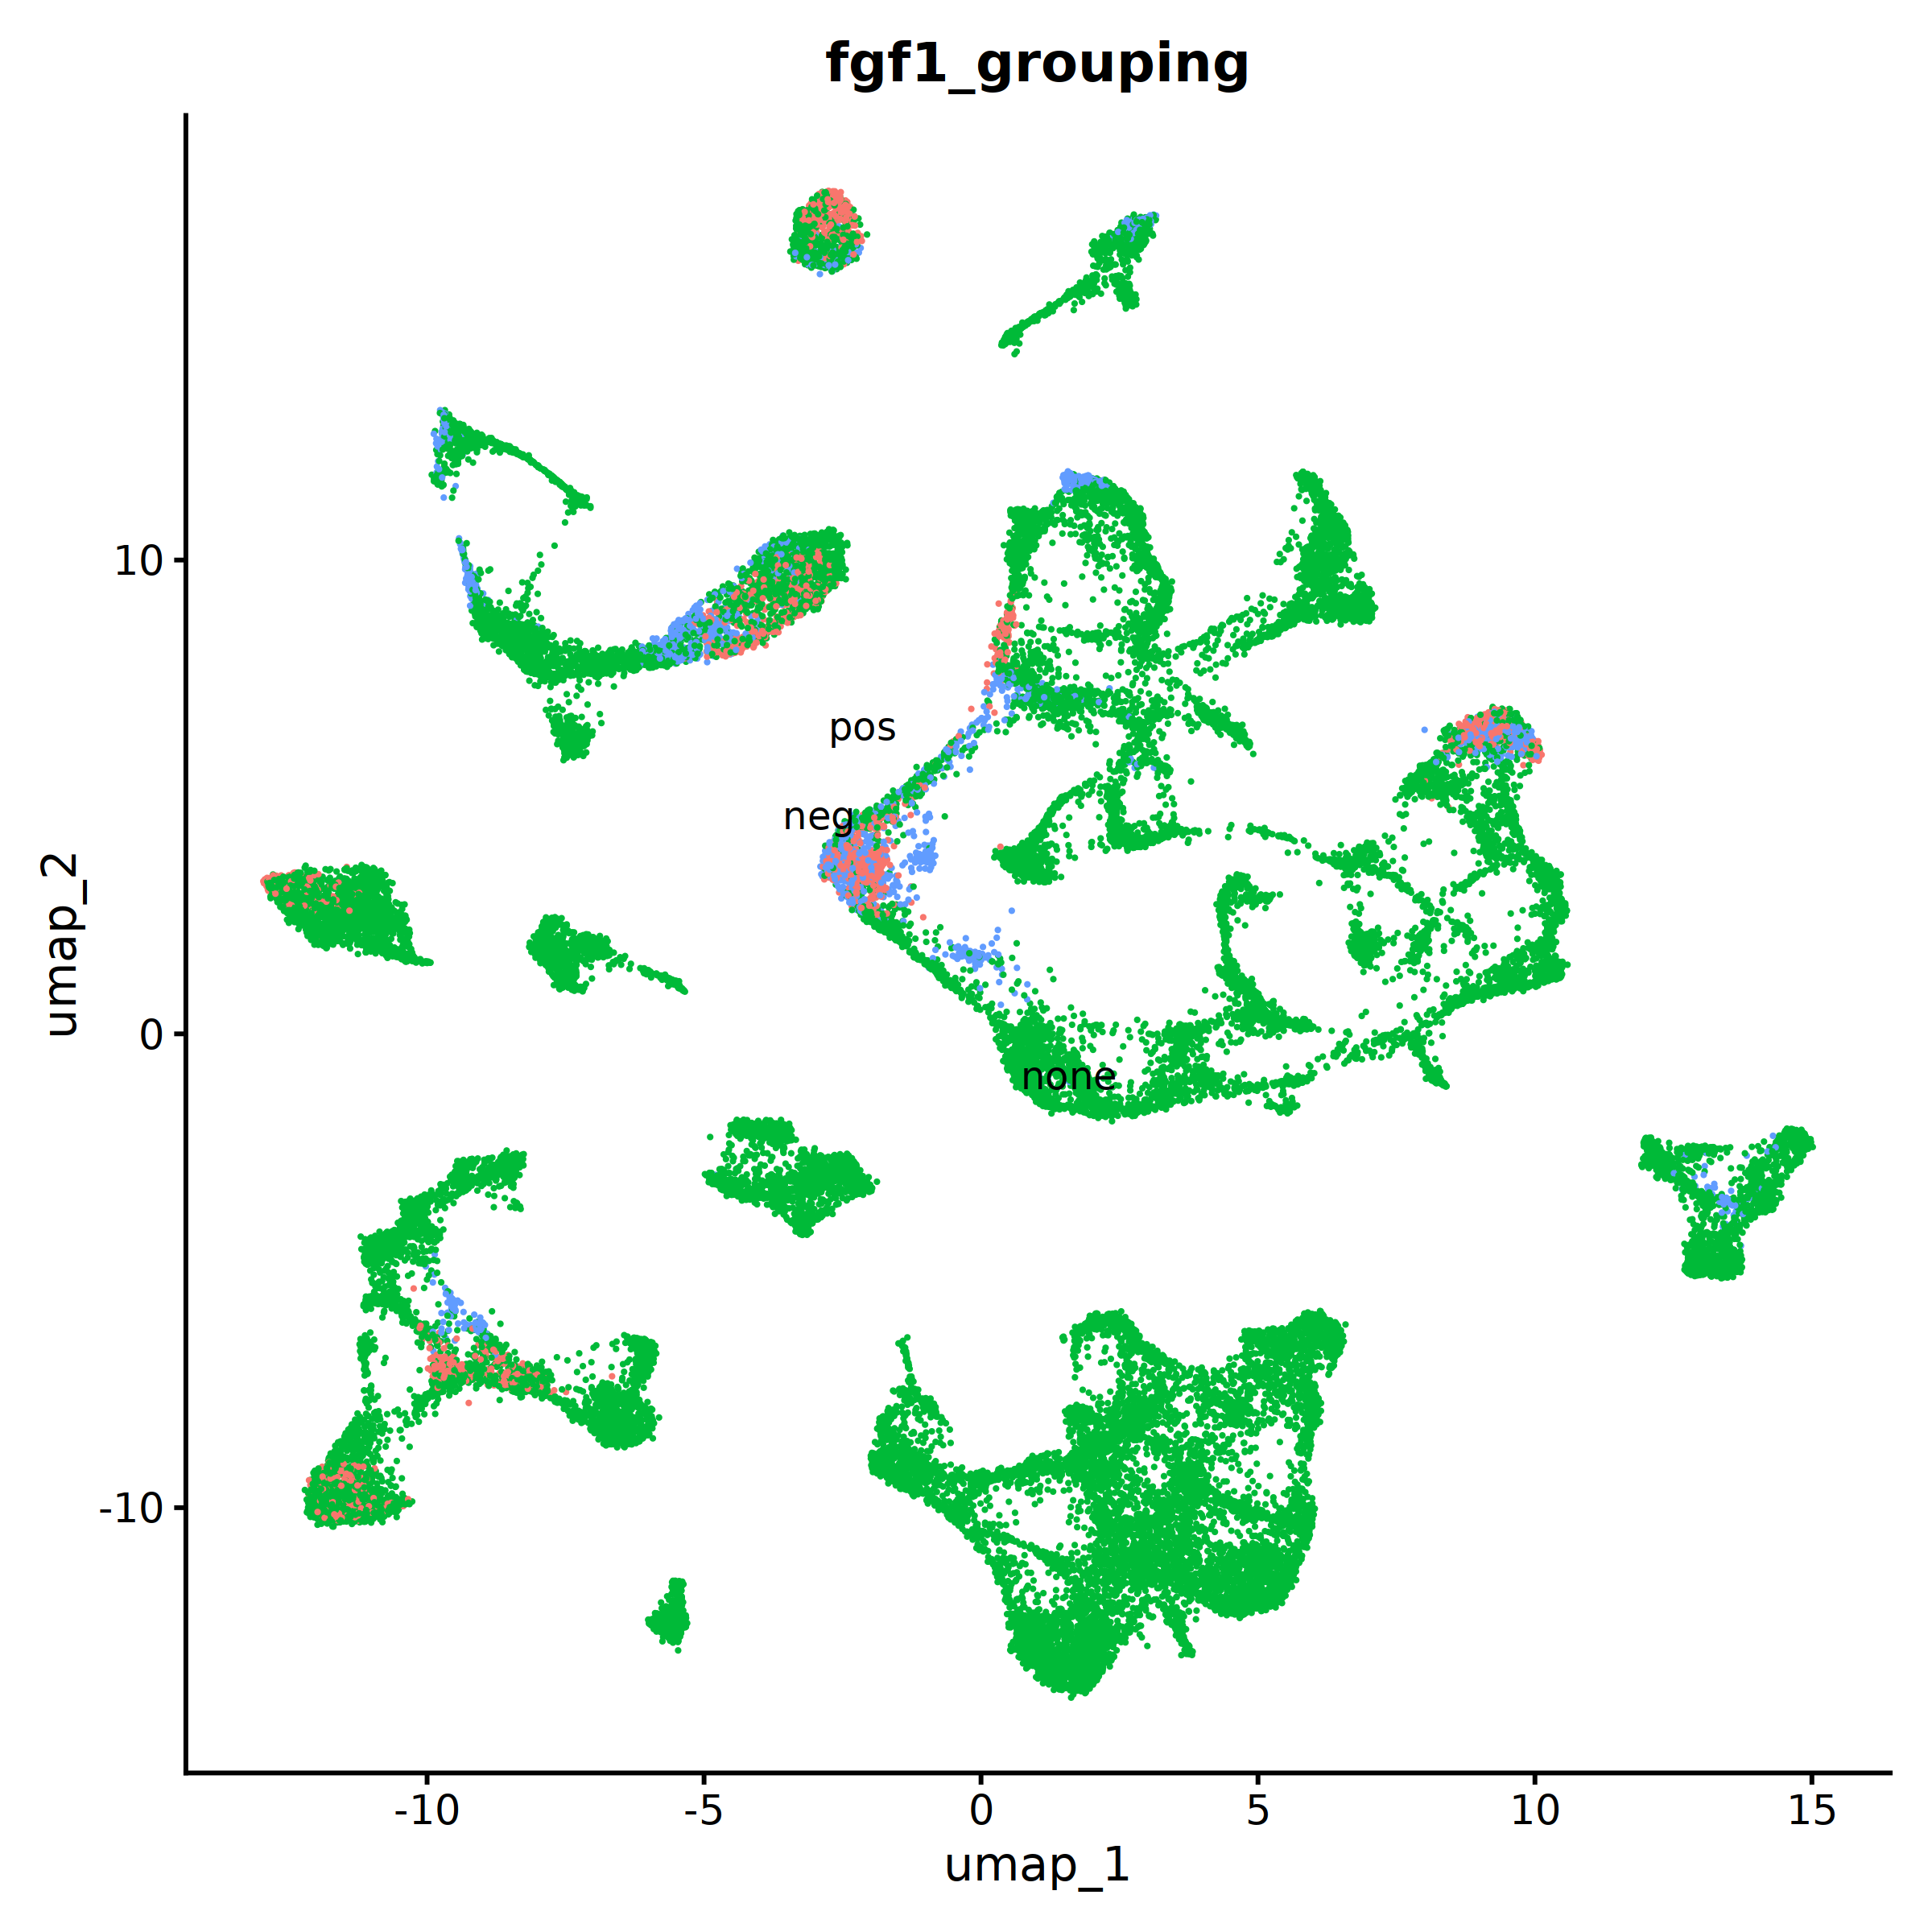

In [88]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(obj, group.by = 'fgf1_grouping', label=TRUE) + NoLegend()